In [36]:
# Imports
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



# 1)  Load the data from the file and show: the first few rows, the output of the .describe() function, the number of rows and columns

In [17]:
path = './exam_2021_01_27.csv'

df = pd.read_csv(path, header=None)

display(df.head())

display(df.describe())

print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

,0,1,2,3,4
0,5.1,3.5,a,NaN,0
1,4.9,3.0,a,NaN,0
2,NaN,3.2,a,NaN,0
3,4.6,NaN,a,0.2,0
4,5.0,3.6,a,0.2,0


,0,1,3,4
count,141.000000,140.000000,137.000000,150.000000
mean,5.897872,3.036429,1.290511,1.000000
std,0.820232,0.437654,0.733934,0.819232
min,4.300000,2.000000,0.100000,0.000000
25%,5.200000,2.800000,0.400000,0.000000
50%,5.800000,3.000000,1.400000,1.000000
75%,6.400000,3.300000,1.800000,2.000000
max,7.900000,4.400000,2.500000,2.000000


The dataset has 150 rows and 5 columns


# 2) Since the data contain nulls, eliminate the rows with nulls

In [18]:
df.dropna(inplace=True)

# 3) Since one of the predicting attributes is ordinal, it must be converted into numeric, you can use the OrdinalEncoder

In [19]:
# We know by sight that it is the column 2
oe = OrdinalEncoder()
df[2] = oe.fit_transform(np.reshape(df[2], (-1,1)))

# 4) Split the data into train and test 

In [24]:
from sklearn.model_selection import train_test_split
y = df[4]
X = df.drop(4, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y)

# 5) Use two classification models of your choice (say: model 1 and model 2) execute the tasks below

In [30]:
random_state = 42

models_name = ['dt', 'knn']

models = {
    'dt': {'name': 'Decision Tree       ',
           'estimator': DecisionTreeClassifier(random_state=random_state), 
           'param': [{'max_depth': [*range(1,20)],'class_weight':[None,'balanced']}],
           'bestEstimator' : ''
    },
    'knn':{'name': 'K Nearest Neighbor ',
           'estimator': KNeighborsClassifier(),
           'param': [{'n_neighbors': list(range(1,7))}],
           'bestEstimator' : ''
    }
}



In [31]:
cv = 3

for model in models :
    clf = GridSearchCV(models[model]['estimator'], models[model]['param'],
                       cv=cv,
                       scoring='accuracy')
    clf.fit(X_train, y_train)
    models[model]['bestEstimator'] = clf.best_estimator_

# 6) Model 1: find and show the best hyperparameter setting with cross validation on the training set, optimise for the best accuracy

In [34]:
model1 = models['dt']['bestEstimator']

In [35]:
model1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

# 7) Model 1: show the accuracy of classification and the confusion matrix on the test set For the confusion matrix use plot_confusion_matrix normalized in order to show for each class the precision (read carefully the documentation)

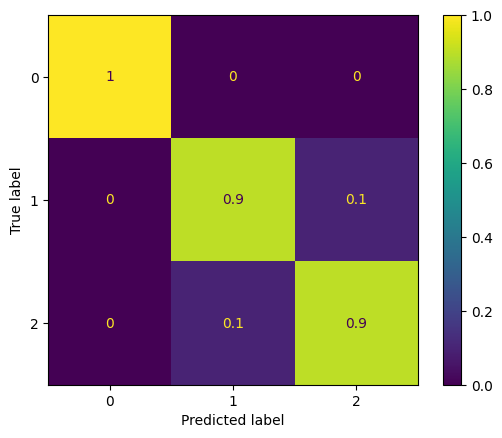

In [48]:
# plot_confusion_matrix is NOW DEPRECATED --> use ConfusionMatrixDisplay()
# plot_confusion_matrix(model1, X_test, y_test, normalize='pred')

y_test_m1 = model1.predict(X_test)
cm_m1 = confusion_matrix(y_test, y_test_m1, normalize='true')
ConfusionMatrixDisplay(cm_m1).plot()

# 8)    Model 2: find and show the best hyperparameter setting with cross validation on the training set, optimise for the best accuracy 

In [49]:
model2 = models['knn']['bestEstimator']

In [50]:
model1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

# 9)  Model 2: show the accuracy of classification and the confusion matrix on the test set For the confusion matrix use plot_confusion_matrix normalized in order to show for each class the precision (read carefully the documentation)

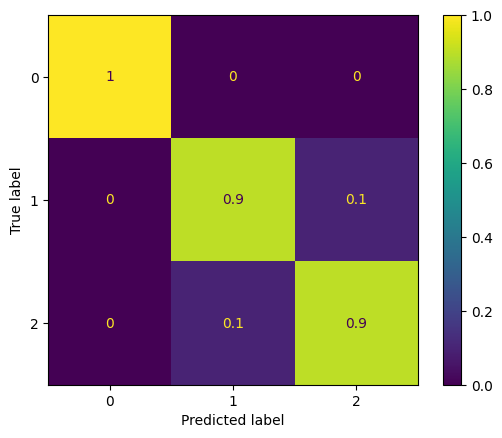

In [51]:
# plot_confusion_matrix is NOW DEPRECATED --> use ConfusionMatrixDisplay()
# plot_confusion_matrix(model1, X_test, y_test, normalize='pred')

y_test_m2 = model2.predict(X_test)
cm_m2 = confusion_matrix(y_test, y_test_m2, normalize='true')
ConfusionMatrixDisplay(cm_m2).plot()